In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
import seaborn as sns

## Plot histogram of gene abundancy for SC and ST data

In [3]:
sc_paths = ["/goofys/Samples/sc_reference/mouse_brain_L5_csr.h5ad", "/goofys/Samples/sc_reference/mouse_brain_L5_csr.h5ad",
            "/goofys/projects/SSI/datasets/mouse_brain_visium_cell2location/visium_mouse_brain_cell2location_sc_unlog1p_pruned_inplace.h5ad",
            "/goofys/Samples/sc_reference/mouse_kidney/GSE157079_P0_adult.h5ad"]
st_paths = ["/goofys/Samples/Stereo_seq/Mouse_brain/SS200000141TL_B5_pruned_inplace.h5ad",
            "/goofys/Samples/Stereo_seq/E16.5_E1S3_cell_bin_whole_brain_noborderct_unlog1p_pruned_inplace.h5ad",
            "/goofys/Samples/10X/mouse_brain_visium_cell2location_pruned_inplace.h5ad",
            "/goofys/Samples/slide_seq/cellxgene_kidney_slide_seq_v2/Puck_191223_19_corr_pruned_inplace.h5ad"]
sc_annotations = ["cell_subclass", "cell_subclass", "annotation_1" ,"clusters"]

ds_names = ['Adult mouse brain', 'Whole mouse embryo brain', 'Visium mouse brain', 'Mouse kidney']
tech = ["Stereo-seq", "Stereo-seq", "10x Visium", "Slide-seq V2"]

Processing Adult mouse brain


/home/nikola_dev/miniconda3/envs/ctopt2/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/nikola_dev/miniconda3/envs/ctopt2/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Processing Whole mouse embryo brain


/home/nikola_dev/miniconda3/envs/ctopt2/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/nikola_dev/miniconda3/envs/ctopt2/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Processing Visium mouse brain
Processing Mouse kidney


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


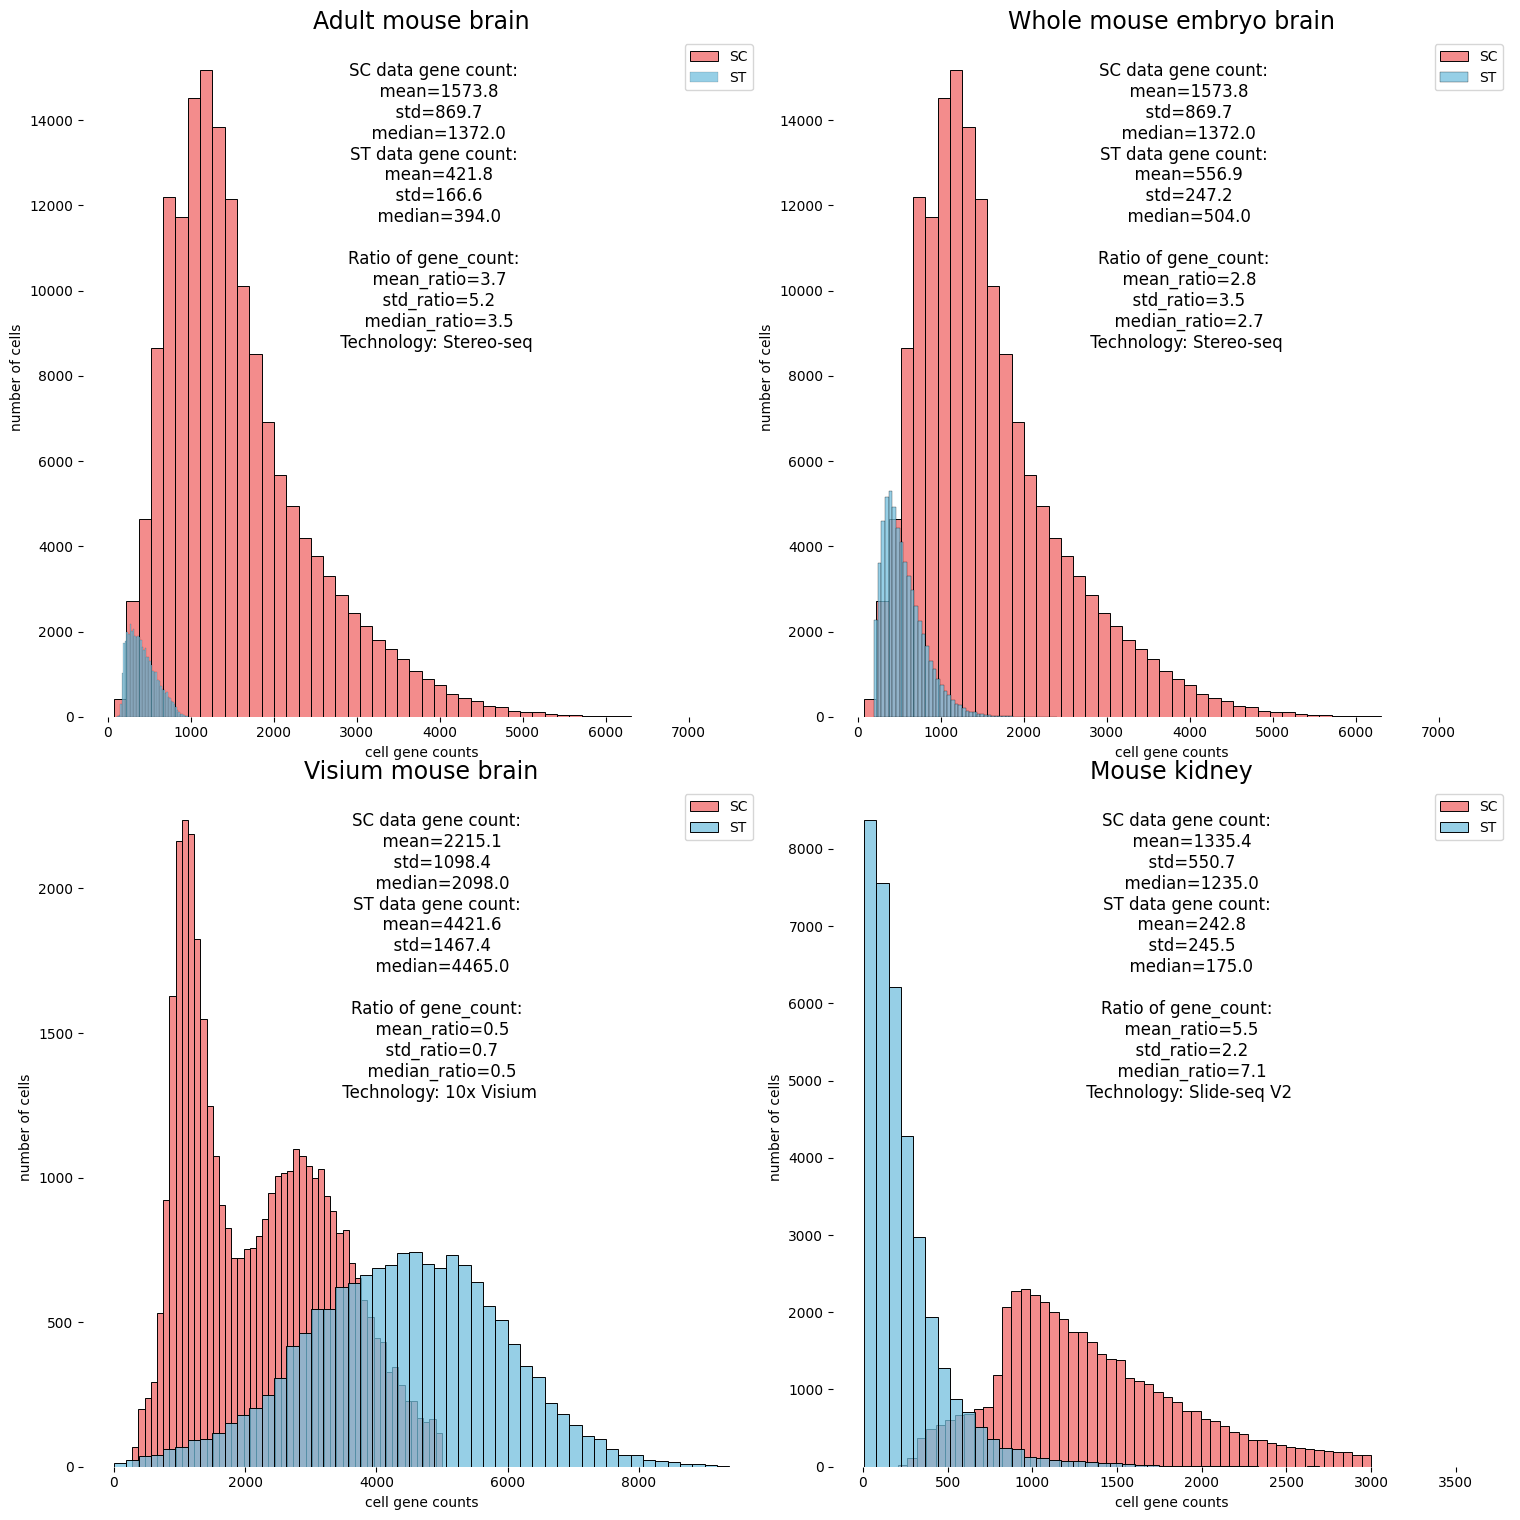

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
plt.title('Cell gene counts histograms')
for ind, (sc_path, st_path, sc_annotation, ds_name, te) in enumerate(zip(sc_paths, st_paths, sc_annotations, ds_names, tech)):
    print(f'Processing {ds_name}')
    sc_adata = sc.read_h5ad(sc_path)
    st_adata = sc.read_h5ad(st_path)
    sc_adata.obs_names_make_unique()
    sc_adata.var_names_make_unique()
    st_adata.obs_names_make_unique()
    st_adata.var_names_make_unique()

    sc_adata.obs['gene_counts'] = (sc_adata.X != 0).sum(axis=1)
    st_adata.obs['gene_counts'] = (st_adata.X != 0).sum(axis=1)

    

    # fig.patch.set_visible(False)

    line = sns.histplot(data=sc_adata.obs['gene_counts'], bins=50, color='#EF6666', ax=ax[ind >> 1][(1 & ind)])
    sns.histplot(data=st_adata.obs['gene_counts'], bins=50, color='#73C0DE', ax=ax[ind >> 1][(1 & ind)])
    # plt.hist(sc_adata.obs['gene_counts'], bins=50, color='#EF6666')
    # plt.hist(st_adata.obs['gene_counts'], bins=50, color='#73C0DE')
    # ax[ind >> 1][(1 & ind)].axis('off')
    ax[ind >> 1][(1 & ind)].set_xlabel("cell gene counts")
    ax[ind >> 1][(1 & ind)].set_ylabel("number of cells")

    ax[ind >> 1][(1 & ind)].legend(['SC', 'ST'])
    ax[ind >> 1][(1 & ind)].set_title(f"{ds_name}", size=17)

    for spine in ax[ind >> 1][(1 & ind)].spines.values():
        spine.set_visible(False)
        
    # Get x and y data from the existing ax object
    x_data = line.get_xlim()[1]
    y_data = line.get_ylim()[1]
    
    # Calculate the middle point of the plot
    x_mid = x_data / 2
    y_mid = 3 * y_data / 4
    
    # Add annotation in the middle
    ann = f"SC data gene count:\n  mean={np.round(np.mean(sc_adata.obs['gene_counts']), 1)}\n  std={np.round(np.std(sc_adata.obs['gene_counts']), 1)}\n  median={np.round(np.median(sc_adata.obs['gene_counts']), 1)}" + \
    f"\nST data gene count:\n  mean={np.round(np.mean(st_adata.obs['gene_counts']), 1)}\n  std={np.round(np.std(st_adata.obs['gene_counts']), 1)}\n  median={np.round(np.median(st_adata.obs['gene_counts']), 1)}" + \
    f"\n\nRatio of gene_count:\n  mean_ratio={np.round(np.mean(sc_adata.obs['gene_counts'])/np.mean(st_adata.obs['gene_counts']), 1)}" + \
    f"\n  std_ratio={np.round(np.std(sc_adata.obs['gene_counts'])/np.std(st_adata.obs['gene_counts']), 1)}" +  \
            f"\n  median_ratio={np.round(np.median(sc_adata.obs['gene_counts'])/np.median(st_adata.obs['gene_counts']), 1)}" + \
                f"\n Technology: {te}"
    

    ax[ind >> 1][(1 & ind)].text(x_mid, y_mid, ann, ha='center', va='center', size=12)
    

plt.tight_layout(pad=0.)

plt.savefig('gene_abundancy_hist.eps', format="eps", dpi=300, bbox_inches='tight')
plt.show()